# MatPlotLib Tutorial

In [44]:
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
from matplotlib.animation import FuncAnimation
import numpy as np
import random
from itertools import count

## Basic plotting

https://www.youtube.com/watch?v=UO98lJQ3QGI&t=369s

The following commands show how to do a basic plot. plt.plot will create a plot object, that can be successively modified. For exemple, the legend function will alter the first graph drawn, then the second

For the format, check the documentation

The styles have all scpecific style, color, etc...

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


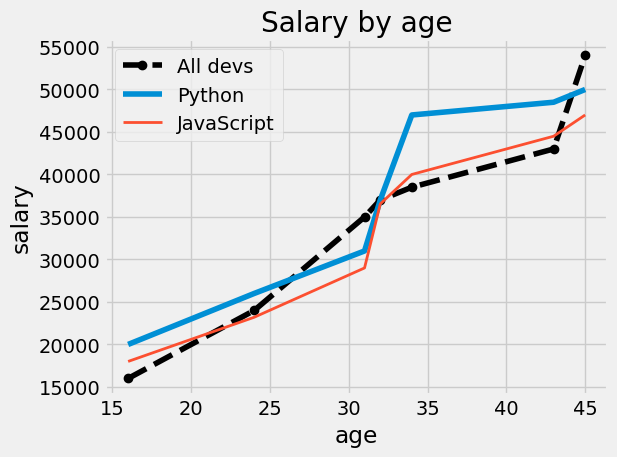

In [42]:
print(plt.style.available)   #print all the available style 
plt.style.use('fivethirtyeight')

age = [24, 45, 31, 16, 32, 34, 43]
salary = [24000, 38500, 16000, 37000, 35000, 43000, 54000]
salary_py = [26000, 48500, 20000, 37000, 31000, 47000, 50000]
salary_js = [23200, 44500, 18000, 36540, 29000, 40000, 47000]
age.sort()
salary.sort()
salary_py.sort()
salary_js.sort()

#Draw the plot (possibility to change the format of the line)
plt.plot(age, salary, color = 'k', linestyle = '--', marker='o', label='All devs')      #possibility to add format string         
plt.plot(age, salary_py, label="Python")  #Add a second line to the graph using the same x-axis, and different values for y.
plt.plot(age, salary_js, linewidth=2, label="JavaScript") 

#legend
plt.title('Salary by age') #add a title
plt.xlabel('age')  #add x legend
plt.ylabel('salary') #add y legend

# plt.legend(['All devs', 'Python_devs'])  #Add legend for the line, will first put the legend on the first line drawn, then the second, by order of line drawn.
plt.legend() #If each line own a "label" argument, the legend is automaticly updated, and it makes the code clearer

plt.grid(True) #display a grid on in the plot.
plt.tight_layout()  #help with the padding 

plt.savefig('plot.png') #save the plot has a png on the current working directory. 



plt.show() #show the plot if not in Jupyter (not necessary in jupyter notebook)

## BarChart

Adding 2 barplot on the same chart will make the bar beeing overlapped by the different datas. 
To separate the barchart and have all the bar line-up side by side, adding a width using numpy to separate the x values is necessary.
Using the xticks method allow to change the label of the x-axis to match the actual x values, and not the indexes. 

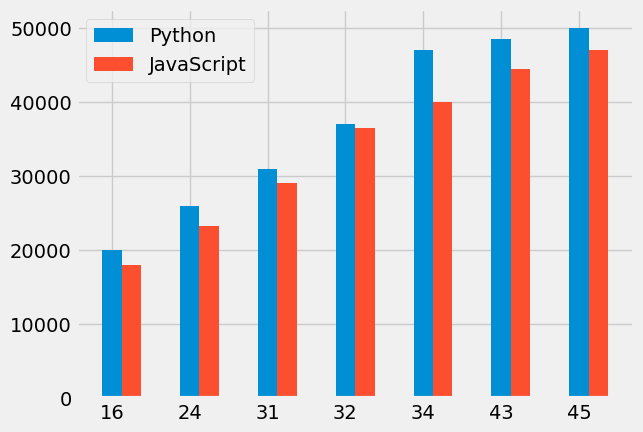

In [46]:
x_indexes = np.arange(len(age))
width = 0.25

plt.bar(x_indexes, salary_py, label="Python", width=width)  #Add a second line to the graph using the same x-axis, and different values for y.
# plt.plot(age, salary_js, linewidth=2, label="JavaScript") #possibility to overlay barchart with plot chart.
plt.bar(x_indexes+width, salary_js, label="JavaScript", width=width) 
plt.legend()
plt.xticks(ticks=x_indexes, labels=age)
plt.show()


<BarContainer object of 7 artists>

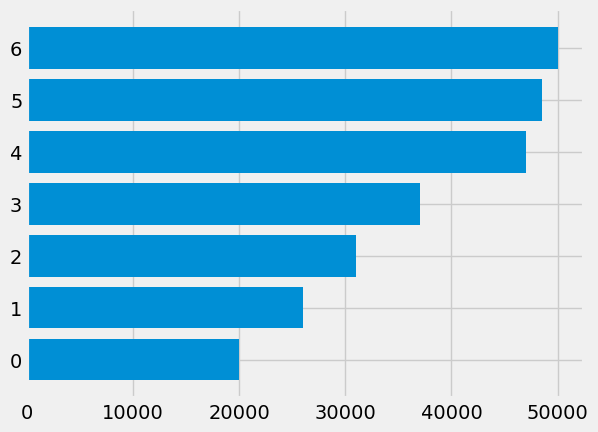

In [50]:
plt.barh(x_indexes, salary_py, label="Python")   #horizontal bar chart

## Pie Charts

Pie chart will calculate the proportion of each value in the list passed for plotting.
wedgeprops is an usefull argument to pass some personalization of the piechart. 
To personalize the colors, we can use the name of the colors or use the Hex colors code, used in HTML CSS programming


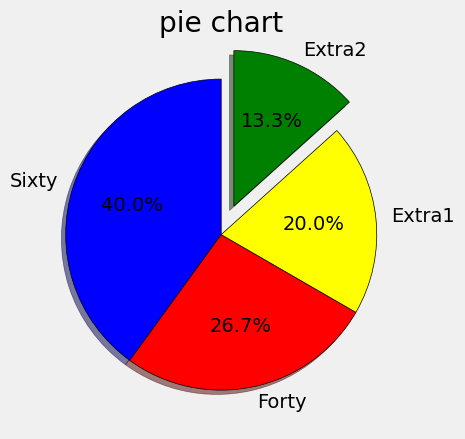

In [78]:
slices = [60, 40, 30, 20]
labels = ['Sixty', 'Forty', 'Extra1', 'Extra2']
colors = ['blue', 'red', 'yellow', 'green']
explode = [0, 0, 0, 0.2]    #set a spacer out of the radius for of one of the portion (20 % for the last portion)


plt.pie(slices, labels=labels, wedgeprops={'edgecolor':'black'}, colors=colors, explode=explode, shadow=True, startangle=90,
        autopct='%1.1f%%')
#wedgeprops: draw an edge, startangle : rotate the piechart, autopct : write the percentage of each piece, 
plt.title('pie chart')
plt.show()

## Stack plot (area charts)

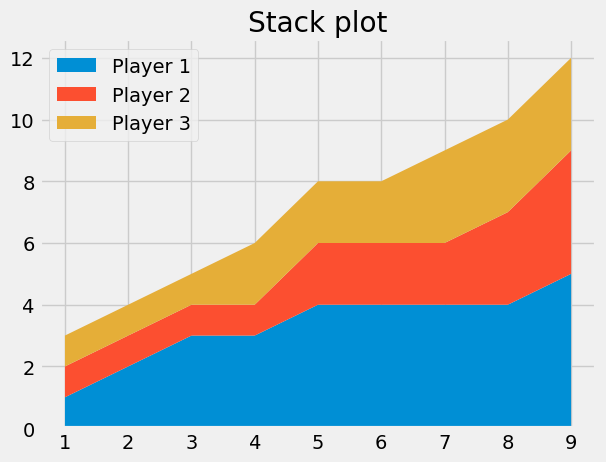

In [90]:
minutes = [1, 2, 3, 4, 5, 6, 7, 8, 9]
#How many points each players scored during each minutes
player1 = [1, 2, 3, 3, 4, 4, 4, 4, 5] 
player2 = [1, 1, 1, 1, 2, 2, 2, 3, 4]
player3 = [1, 1, 1, 2, 2, 2, 3, 3, 3]
labels = ['Player 1', 'Player 2', 'Player 3']


plt.stackplot(minutes, player1, player2, player3, labels=labels)

plt.legend(loc='upper left')   #loc attributes is usefull to relocate the legend in case the defaut location dosn't fit
                               #Can also recieve coordinates tupples: (0.07, 0.05) for exemple

plt.title("Stack plot")
plt.show()

## Filling area on line plots

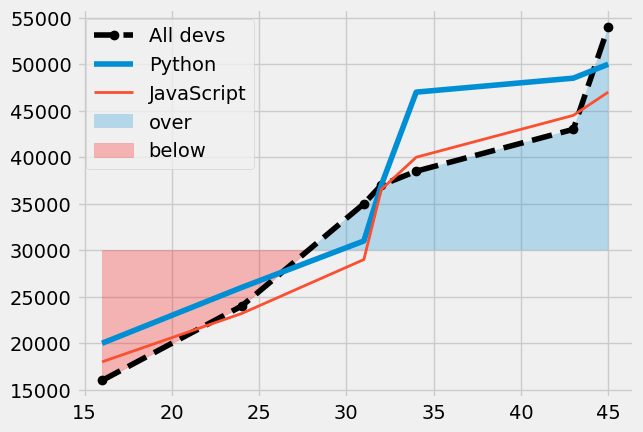

In [117]:
age = [24, 45, 31, 16, 32, 34, 43]
salary = [24000, 38500, 16000, 37000, 35000, 43000, 54000]
salary_py = [26000, 48500, 20000, 37000, 31000, 47000, 50000]
salary_js = [23200, 44500, 18000, 36540, 29000, 40000, 47000]
age.sort()
salary.sort()
salary_py.sort()
salary_js.sort()
salary= np.array(salary)

#Draw the plot (possibility to change the format of the line)
plt.plot(age, salary, color = 'k', linestyle = '--', marker='o', label='All devs')      #possibility to add format string         
plt.plot(age, salary_py, label="Python")  #Add a second line to the graph using the same x-axis, and different values for y.
plt.plot(age, salary_js, linewidth=2, label="JavaScript") 

# plt.fill_between(age, salary )  #will fill between the x axis and the line salary.
plt.fill_between(age, salary, 30000, alpha=0.25,#will fill between the line salary and 30 000, over the whole x axis. Alpha argument will set the transparency of the fill.
                 where=(salary > 30000), interpolate=True, label='over' )  #conditional fill : will only fill when the condition is respected (work only with array or df)

plt.fill_between(age, salary, 30000, alpha=0.25,
                 where=(salary <= 30000), color='red', interpolate=True, label='below' )

plt.legend()

## Histograms

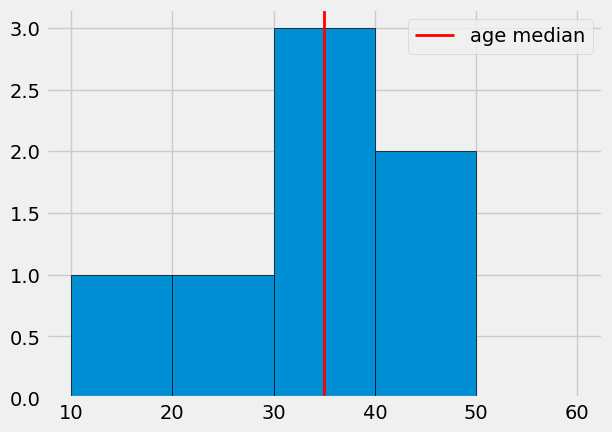

In [140]:
age = np.array([24, 45, 31, 16, 32, 34, 43])
salary = np.array([24000, 38500, 16000, 37000, 35000, 43000, 54000])
salary_py = np.array([26000, 48500, 20000, 37000, 31000, 47000, 50000])
salary_js = np.array([23200, 44500, 18000, 36540, 29000, 40000, 47000])
age.sort()
salary.sort()
salary_py.sort()
salary_js.sort()

bins=[10, 20, 30, 40, 50, 60] #The bin will be used to create the scale on wich the data are represented.
plt.hist(age, bins=bins, edgecolor='black')   #this will create histogram and will sum up the number of people for each age category (10 years age category). Using an int for the 
                                              # the argument "bin" will split up the values' range in equal parts.

# possibility to add a vertical line:
plt.axvline(35, color='red', label='age median', linewidth=2)
plt.legend()



## Scatter plots

Usefull to show relationship between 2 sets of values and see their correlation.
Each dots can show different size or color depending of the third or fourth set of values we can pass through the plot.

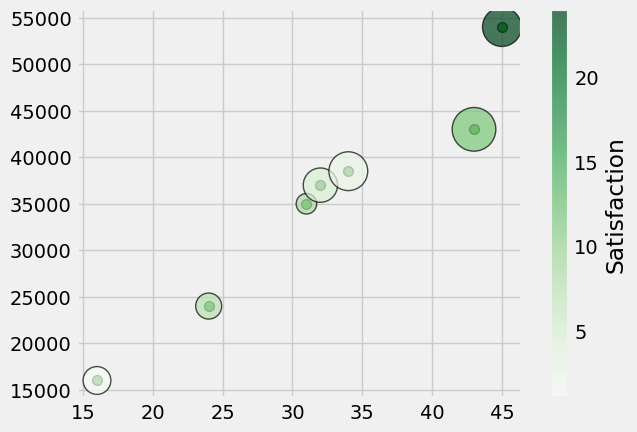

In [169]:
age = [24, 45, 31, 16, 32, 34, 43]
salary = [24000, 38500, 16000, 37000, 35000, 43000, 54000]
salary_py = [26000, 48500, 20000, 37000, 31000, 47000, 50000]
salary_js = [23200, 44500, 18000, 36540, 29000, 40000, 47000]
age.sort()
salary.sort()
salary_py.sort()
salary_js.sort()
salary= np.array(salary)
colors = np.array([1, 8, 9, 5, 3, 12, 24])
sizes = np.array([400, 350, 218, 610, 780, 989, 785])

plt.scatter(age, salary, s=50, c='green', edgecolors='black', linewidths=1, alpha=0.70) #s define the size of all dots. ; c define the color.

plt.scatter(age, salary, s=sizes, c=colors, edgecolors='black', linewidths=1, alpha=0.70, #passing a set of values in the color arguments will color the dots depending 
            cmap='Greens')                                                                #of the values of the third set. cmap argument define the color intensity (here in green)
#passing a fourth set on the sizes arguments will change the size of the dots depending of the value




#creating a color bra legend and his label
cbar = plt.colorbar(label='Satisfaction')
# cbar.set_label('Satisfaction')

#using log for scales to have more uniform data
# plt.xscale('log')
# plt.yscale('log')

## Plotting time series
with "dates" from matplotlib, possibility to format the dates string

C:\Users\GFEEU\AppData\Local\Temp\ipykernel_12336\3697541853.py:14: MatplotlibDeprecationWarning: The plot_date function was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use plot instead.
  plt.plot_date(dates, y, linestyle='solid')


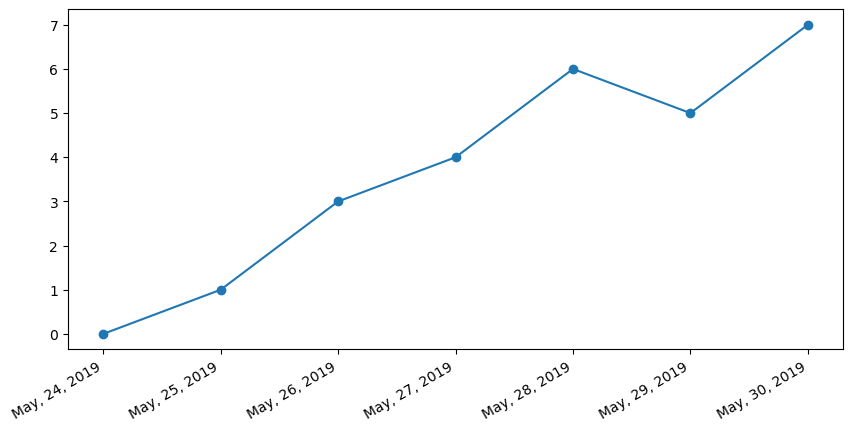

In [42]:
dates=[
    datetime(2019,5, 24),
    datetime(2019,5, 25),
    datetime(2019,5, 26),
    datetime(2019,5, 27),
    datetime(2019,5, 28),
    datetime(2019,5, 29),
    datetime(2019,5, 30)    
]

y = [0,1,3,4,6,5,7]

plt.figure(figsize=(10, 5)) 
plt.plot_date(dates, y, linestyle='solid')

plt.gcf().autofmt_xdate()   #format the date on the current figure (Get Current Figure) and not on the pyplot object.

date_format = mpl_dates.DateFormatter('%b, %d, %Y')   #Format for datetime (Month, days, years)

plt.gca().xaxis.set_major_formatter(date_format)  #gca = get current axis

## Plotting live data in real-time

In [ ]:
x_vals = []
y_vals = []

index = count()   #create an iterable, each next element will be incremented

def animate(i):
    x_vals.append(next(index))
    y_vals.append(random.randint(0,5))
    
    plt.cla()  #this will clear the axis 
    plt.plot(x_vals, y_vals)

ani = FuncAnimation(plt.gcf(), animate, interval=1000)   #Matplotlib will use the current plot, and update it with the animate function each second. It will trace a new line covering up 
#the olds one each second.




## Subplots

<p>Creating plots with subplot method (object oriented)</p>
<p>Working with the same plot used in basic plotting.</p>

Text(0, 0.5, 'salary')

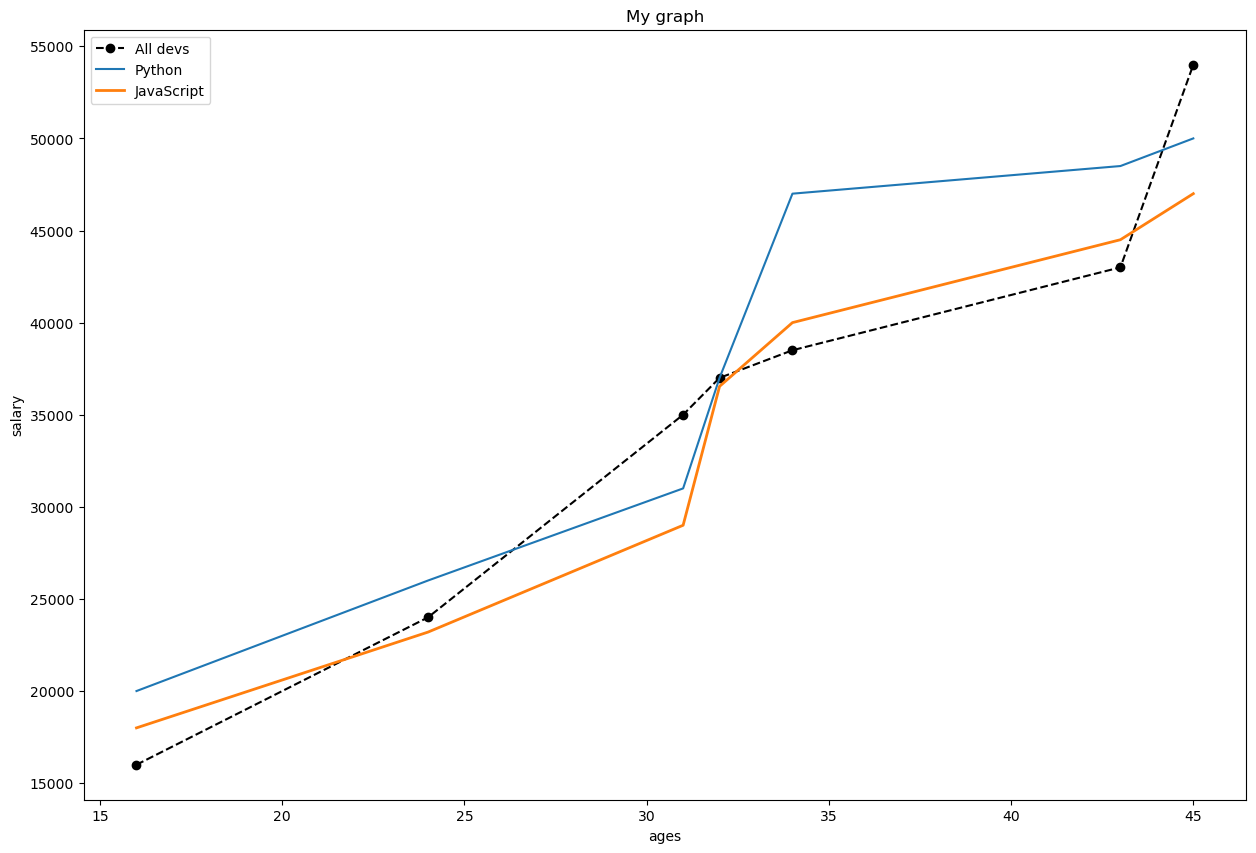

In [88]:
age = [24, 45, 31, 16, 32, 34, 43]
salary = [24000, 38500, 16000, 37000, 35000, 43000, 54000]
salary_py = [26000, 48500, 20000, 37000, 31000, 47000, 50000]
salary_js = [23200, 44500, 18000, 36540, 29000, 40000, 47000]
age.sort()
salary.sort()
salary_py.sort()
salary_js.sort()

fig, ax = plt.subplots()    #create a figure with 1 row, and 1 column (1 axis)

ax.plot(age, salary, color = 'k', linestyle = '--', marker='o', label='All devs')      #possibility to add format string         
ax.plot(age, salary_py, label="Python")  #Add a second line to the graph using the same x-axis, and different values for y.
ax.plot(age, salary_js, linewidth=2, label="JavaScript") 


#Setting name on the graph, the figure contains all the plots.
ax.legend()
ax.set_title("My graph")
ax.set_xlabel('ages')
ax.set_ylabel('salary')

### Plotting multiple graph

Text(0, 0.5, 'salary')

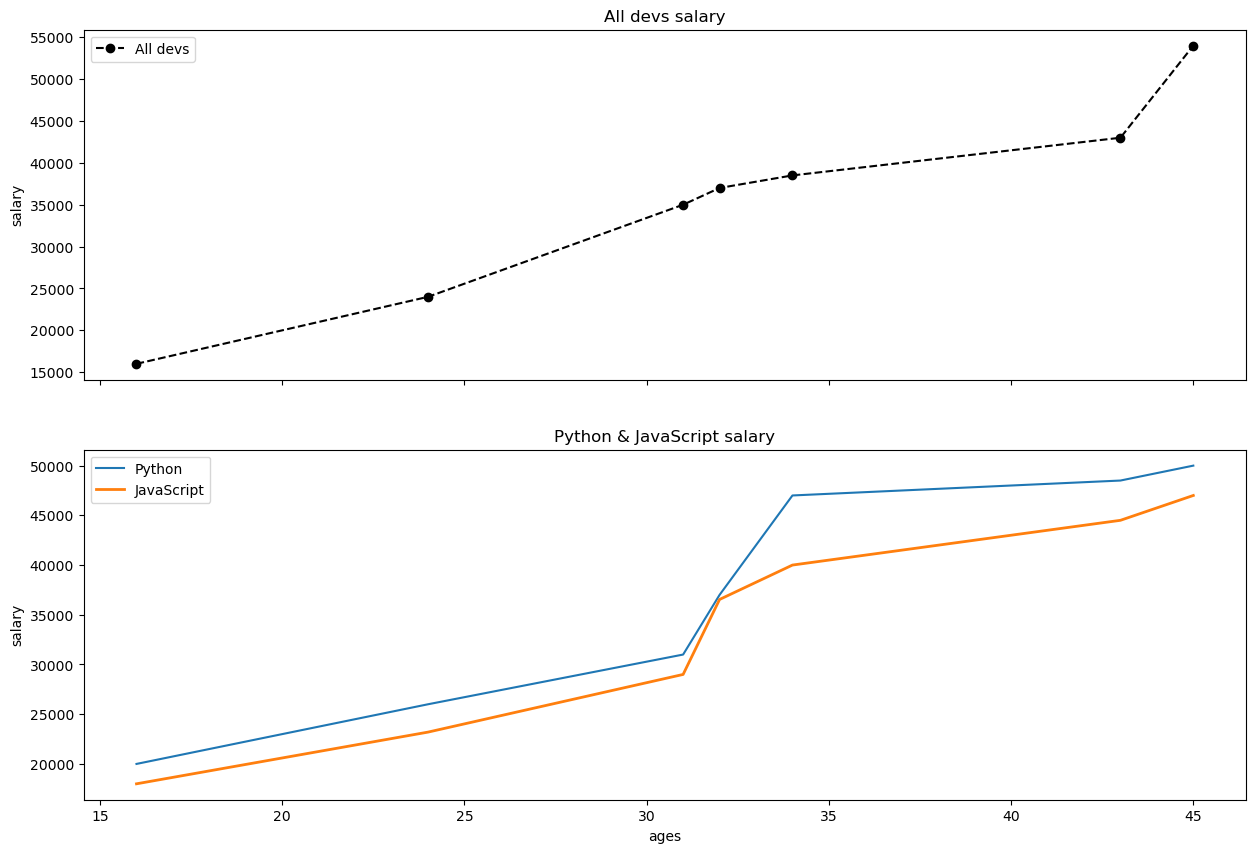

In [104]:
# fig, ax = plt.subplots(nrows=2, ncols=1)    #create a figure with 2 rows and 1 col
# ax  #the ax variable contains now 2 object, 1 for each graph

# fig, ax = plt.subplots(nrows=2, ncols=2)    #create a figure with 2 rows and 2 col
# ax  #the ax variable has now 4 object :  1 list for each row containing 2 elements (columns)


#Possibility to unpack the "ax" value :
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True)   #1 figure with 2 graphs

ax1.plot(age, salary, color = 'k', linestyle = '--', marker='o', label='All devs')    #will plot on the graph 1      
ax2.plot(age, salary_py, label="Python")  #will plot on the graph 2
ax2.plot(age, salary_js, linewidth=2, label="JavaScript")

ax1.legend()
ax1.set_title("All devs salary")
ax1.set_ylabel('salary')

ax2.legend()
ax2.set_title("Python & JavaScript salary")
ax2.set_xlabel('ages')
ax2.set_ylabel('salary')

### 2 plots on 2 different figures

Text(0, 0.5, 'salary')

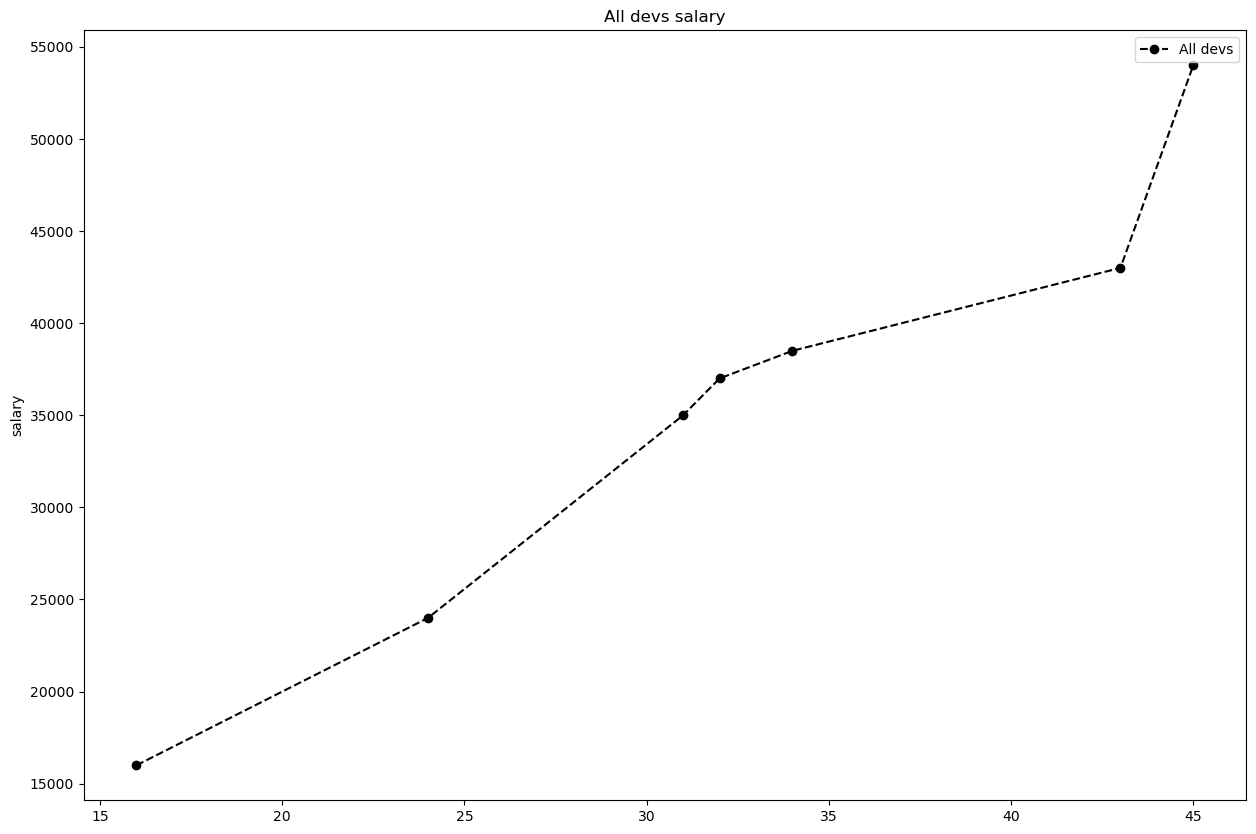

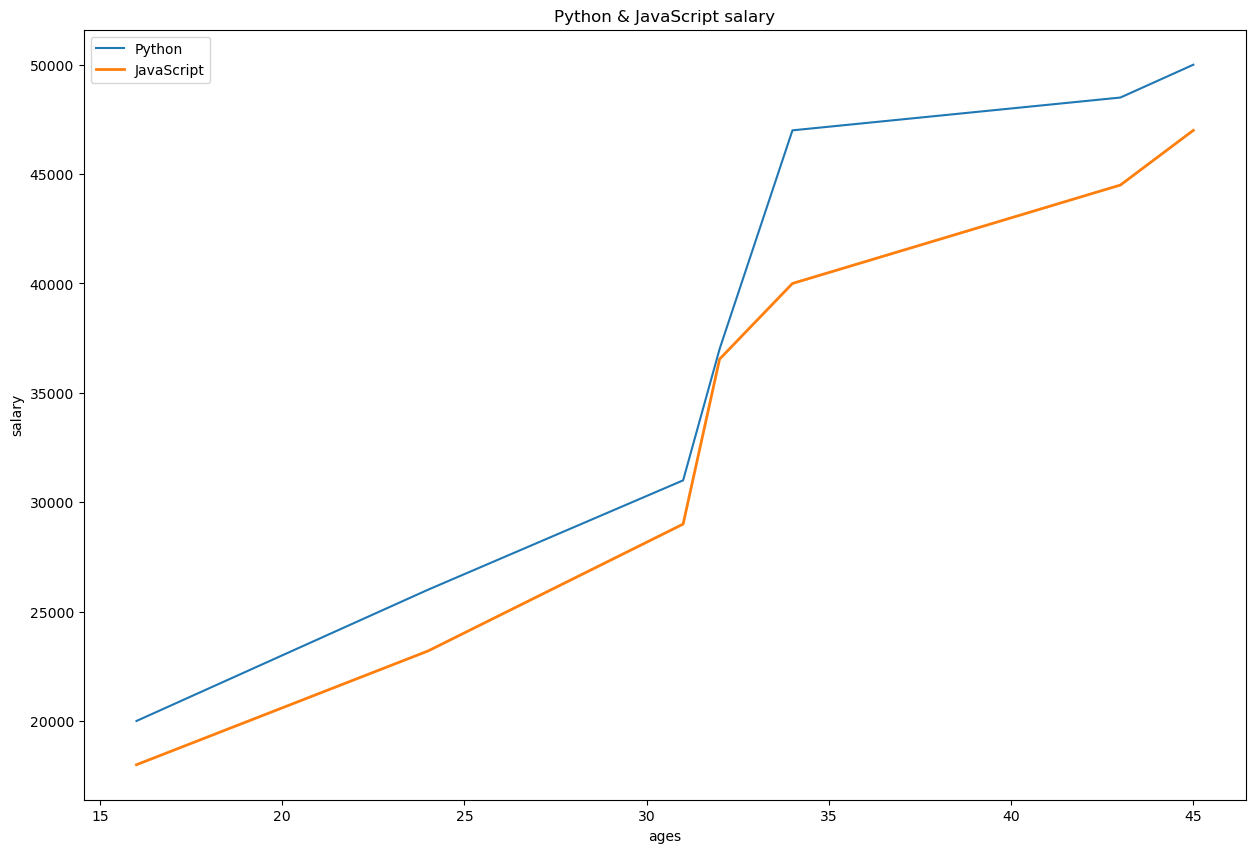

In [105]:
fig1, ax1 = plt.subplots()   
fig1, ax2 = plt.subplots()   #2 figures with 1 graph each

ax1.plot(age, salary, color = 'k', linestyle = '--', marker='o', label='All devs')    #will plot on the graph 1      
ax2.plot(age, salary_py, label="Python")  #will plot on the graph 2
ax2.plot(age, salary_js, linewidth=2, label="JavaScript")

ax1.legend()
ax1.set_title("All devs salary")
ax1.set_ylabel('salary')

ax2.legend()
ax2.set_title("Python & JavaScript salary")
ax2.set_xlabel('ages')
ax2.set_ylabel('salary')